In [27]:
import click
import pandas as pd
import  gseapy as gp
from gseapy import barplot, dotplot
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests


In [96]:
def plt_manhan(df_tgt,fdr_method='bonferroni',pval_str='P_value',pad_size=100,figsize=(8,4)):
    df_tgt['FDR'] = multipletests(df_tgt[pval_str],method=fdr_method)[1]
    # Plot using sns.scatterplot directly
    plt.figure(figsize=figsize)  # Adjust the figure size if needed

    # Add the scatter plot with conditional point sizes    
    sizes = df_tgt['FDR'].apply(lambda x: 15 if x < 0.05 else 10)

    sns.scatterplot(data=df_tgt, x='i', y='log10P', hue='chromsome', 
                    palette='dark',size=sizes, sizes=(10, 20), alpha=0.4, edgecolor='black',linewidth=0.2,
                    legend=None)

    # Group data by 'CHR' and calculate the median of 'i' for xticks
    chorm_df = df_tgt.groupby('chromsome')['i'].median()
    plt.xticks(ticks=chorm_df, labels=xlabel_tgt)

    # Set axis labels with adjusted labelpad for xlabel
    plt.xlabel('Chromosome', fontsize=14, labelpad=10)
    plt.ylabel('-log$_{10}P$', fontsize=14,labelpad=10)

    plt.axhline(y=-np.log10(df_tgt[df_tgt['FDR']>=0.05][pval_str].min()), color='red', linestyle='--', linewidth=1)
    plt.xlim(df_tgt['i'].min()-pad_size, df_tgt['i'].max()+pad_size)
    sns.despine()

In [93]:
import numpy as np
import seaborn as sns

In [86]:
df = pd.read_csv('../../../../seGene_test/results/tables/R_vs_C.sdGenes.results.tsv',sep='\t')

In [ ]:
xlabel_tgt = ['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '29',
 '21',
 '22',
 'X',
 'Y',
 'M']

In [80]:
def pre_handle_data(df_in,pval_str='pvalue'):
    df = df_in.copy()
    df['chromsome'] = pd.Categorical(df['chromsome'], categories=categories, ordered=True)
    df.sort_values('chromsome',inplace=True)
    df['pos'] = df.apply(lambda x:int(np.mean([x['start'],x['end']])),axis=1)
    df['log10P'] = -np.log10(df[pval_str])
    df['i'] = np.arange(df.shape[0]) + 1
    return df

In [73]:
categories = ['chr1','chr2', 'chr3','chr4','chr5','chr6','chr7','chr8','chr9',
              'chr10','chr11','chr12','chr13','chr14','chr15','chr16','chr17',
              'chr18','chr19','chr20','chr21','chr22','chrX','chrY','chrM']

In [82]:
df_plot = pre_handle_data(df,pval_str='pvalue')


In [90]:
df_plot = df_plot.drop_duplicates('gene_name')

In [ ]:
df_plot = pre_handle_data(df_plot,pval_str='pval_Q')


/tmp/ipykernel_2019845/143517303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tgt['FDR'] = multipletests(df_tgt[pval_str],method=fdr_method)[1]
/tmp/ipykernel_2019845/143517303.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chorm_df = df_tgt.groupby('chromsome')['i'].median()


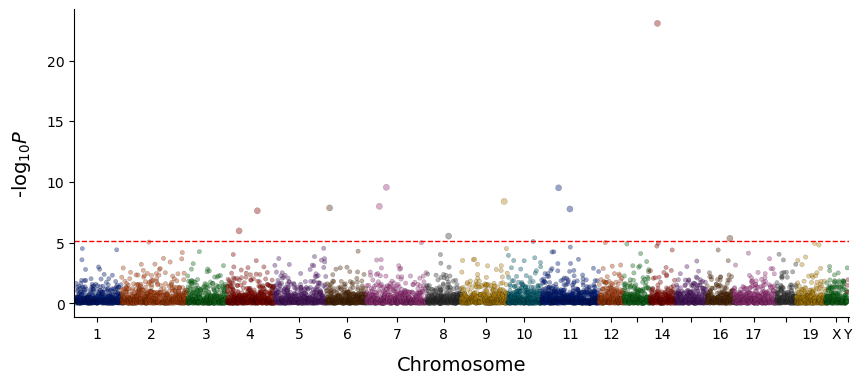

In [99]:
plt_manhan(df_plot,fdr_method='bonferroni',pval_str='pvalue',figsize=(10,4))


In [ ]:
df_plot = pre_handle_data(df_plot,pval_str='pval_Q')
plt_manhan(df_plot,fdr_method='bonferroni',pval_str='pval_Q',figsize=(10,4))
plt.ylim(0,30)
plt.savefig('results/01.logit_results/figs/ACS_vs_NC.isoform_ab.manha.pdf',bbox_inches='tight')
plt.savefig('results/01.logit_results/figs/ACS_vs_NC.isoform_ab.manha.png',dpi=300,bbox_inches='tight')